In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from utils import classification_evaluation, user_input, pipe_model

# Dataframe 1

In [2]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')

In [3]:
dataframe.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,gender_women
0,1,20228,140,90,3,1,0,0,1,1,55,34.927679,1
1,2,18857,130,70,3,1,0,0,0,1,52,23.507805,1
2,4,17474,100,60,1,1,0,0,0,0,48,23.011177,1
3,9,22113,130,80,3,1,0,0,1,0,61,37.729725,1
4,12,22584,130,90,3,3,0,0,1,1,62,29.983588,0


In [4]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [5]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Splitting the data into training and validation sets
X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

----

## Feature standardisation using StandardScaler()

Feature standardization transforms the features so that they have a mean of zero and a standard deviation of one. This is done by subtracting the mean from each value and then dividing by the standard deviation. The result is a new dataset where each feature has a similar range of values and is centered around zero.

In [6]:
scaler = StandardScaler()

pipeline_log_regression = Pipeline(
    [
        ("scaler", scaler),
        (
            "log",
            LogisticRegression(
                solver="saga", multi_class="ovr", max_iter=10000, penalty="elasticnet"
            ),
        ),
    ]
)


l1_ratio = np.linspace(0, 1, 50)

parameter_grid_log_regression = {"log__l1_ratio": l1_ratio, "log__class_weight": [None, "balanced"],}

classifier_log_regression = GridSearchCV(
    estimator=pipeline_log_regression,
    param_grid=parameter_grid_log_regression,
    cv=5,
    scoring="accuracy",
)


In [7]:
classifier_log_regression.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__class_weight': [None, 'balanced'],
                         'log__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.204...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='accuracy')

In [8]:
classifier_log_regression.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(class_weight='balanced', l1_ratio=0.6326530612244897,
                      max_iter=10000, multi_class='ovr', penalty='elasticnet',
                      solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(class_weight='balanced', l1_ratio=0.6326530612244897,
                    max_iter=10000, multi_class='ovr', penalty='elasticnet',
                    solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': 'balanced',
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.6326530612244897,
 'log__max_iter': 10000,
 'log__multi_class': 'ovr',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      3241
           1       0.76      0.67      0.71      3102

    accuracy                           0.73      6343
   macro avg       0.74      0.73      0.73      6343
weighted avg       0.74      0.73      0.73      6343



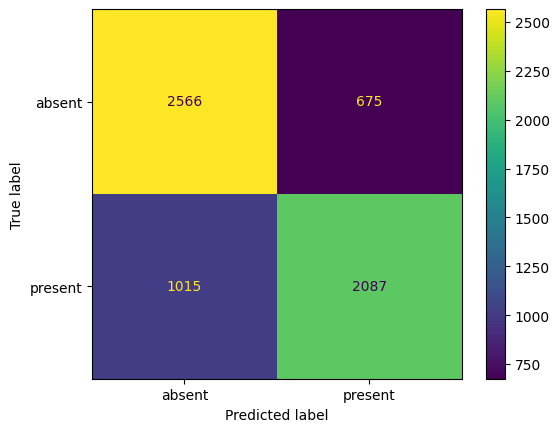

In [9]:
classification_evaluation(model=classifier_log_regression, x_test=X_val, y_test=y_val)

In [10]:
#Training entire X_train dataset
classifier_log_regression.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__class_weight': [None, 'balanced'],
                         'log__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.204...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='accuracy')

In [11]:
y_predictions = classifier_log_regression.predict(X_test)

In [12]:
print(y_predictions[:10], y_test[:10].to_list())

[0 0 0 0 0 1 1 0 0 1] [0, 1, 0, 0, 0, 1, 1, 0, 0, 0]


----

## Using feature normalization with MinMaxScaler

Feature normalization scales the features so that they have a minimum value of zero and a maximum value of one. This is done by subtracting the minimum value from each value and then dividing by the range. The result is a new dataset where each feature has values between zero and one. 

In [13]:
scaler_min = MinMaxScaler()

pipeline_log_regression_min = Pipeline(
    [
        ("scaler", scaler_min),
        (
            "log",
            LogisticRegression(
                solver="saga", multi_class="ovr", max_iter=10000, penalty="elasticnet"
            ),
        ),
    ]
)


l1_ratio = np.linspace(0, 1, 50)

parameter_grid_log_regression = {"log__l1_ratio": l1_ratio, "log__class_weight": [None, "balanced"],}

classifier_log_regression_min = GridSearchCV(
    estimator=pipeline_log_regression,
    param_grid=parameter_grid_log_regression,
    cv=5,
    scoring="accuracy",
)

In [14]:
classifier_log_regression_min.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__class_weight': [None, 'balanced'],
                         'log__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.204...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='accuracy')

In [15]:
classifier_log_regression_min.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(class_weight='balanced', l1_ratio=0.6326530612244897,
                      max_iter=10000, multi_class='ovr', penalty='elasticnet',
                      solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(class_weight='balanced', l1_ratio=0.6326530612244897,
                    max_iter=10000, multi_class='ovr', penalty='elasticnet',
                    solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': 'balanced',
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.6326530612244897,
 'log__max_iter': 10000,
 'log__multi_class': 'ovr',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      3241
           1       0.76      0.67      0.71      3102

    accuracy                           0.73      6343
   macro avg       0.74      0.73      0.73      6343
weighted avg       0.74      0.73      0.73      6343



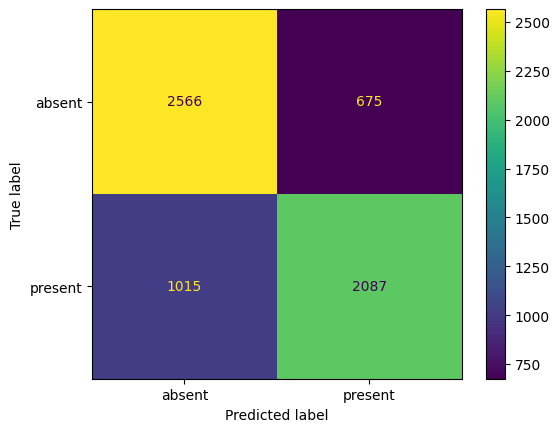

In [16]:
classification_evaluation(model=classifier_log_regression_min, x_test=X_val, y_test=y_val)

In [17]:
classifier_log_regression_min.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__class_weight': [None, 'balanced'],
                         'log__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.204...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='accuracy')

In [18]:
y_predictions_min = classifier_log_regression_min.predict(X_test)

In [19]:
print(y_predictions_min[:10], y_test[:10].to_list())

[0 0 0 0 0 1 1 0 0 1] [0, 1, 0, 0, 0, 1, 1, 0, 0, 0]


---

# Dataframe 2

In [20]:
dataframe_2 = pd.read_csv('../data/cleaned_dataset_1.csv')

In [21]:
X2, y2 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [22]:
X2_train_for_val, X2_val, y2_train_for_val, y2_val = train_test_split(X2_train, y2_train, test_size=0.2)

X2_train_for_val.shape, X2_val.shape, y2_train_for_val.shape, y2_val.shape

((25369, 12), (6343, 12), (25369,), (6343,))

---

### 1. Using the standard scaler on the second dataset

In [23]:
classifier_log_regression.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__class_weight': [None, 'balanced'],
                         'log__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.204...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='accuracy')

In [24]:
classifier_log_regression.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(class_weight='balanced', l1_ratio=0.02040816326530612,
                      max_iter=10000, multi_class='ovr', penalty='elasticnet',
                      solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(class_weight='balanced', l1_ratio=0.02040816326530612,
                    max_iter=10000, multi_class='ovr', penalty='elasticnet',
                    solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': 'balanced',
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.02040816326530612,
 'log__max_iter': 10000,
 'log__multi_class': 'ovr',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      3195
           1       0.74      0.67      0.71      3148

    accuracy                           0.72      6343
   macro avg       0.72      0.72      0.72      6343
weighted avg       0.72      0.72      0.72      6343



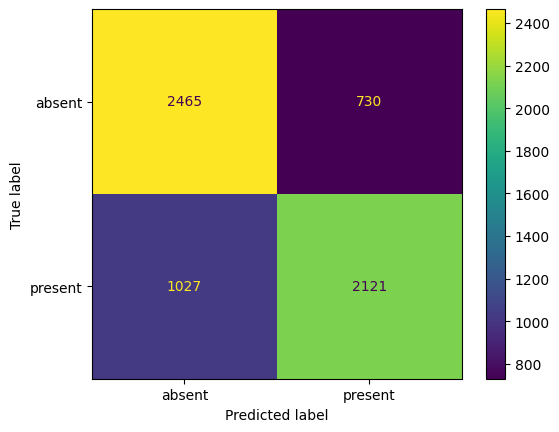

In [25]:
classification_evaluation(model=classifier_log_regression, x_test=X2_val, y_test=y2_val)

---

### 2. Using the normalisation scaler on the dataset 2

In [26]:
classifier_log_regression_min.fit(X2_train_for_val, y2_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__class_weight': [None, 'balanced'],
                         'log__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.204...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='accuracy')

In [27]:
classifier_log_regression_min.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(class_weight='balanced', l1_ratio=0.02040816326530612,
                      max_iter=10000, multi_class='ovr', penalty='elasticnet',
                      solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(class_weight='balanced', l1_ratio=0.02040816326530612,
                    max_iter=10000, multi_class='ovr', penalty='elasticnet',
                    solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': 'balanced',
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.02040816326530612,
 'log__max_iter': 10000,
 'log__multi_class': 'ovr',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      3195
           1       0.74      0.67      0.71      3148

    accuracy                           0.72      6343
   macro avg       0.72      0.72      0.72      6343
weighted avg       0.72      0.72      0.72      6343



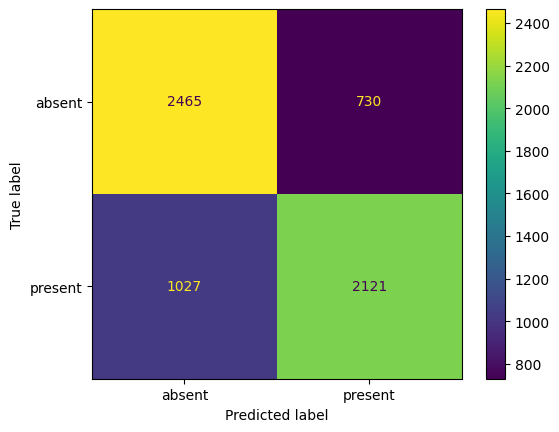

In [28]:
classification_evaluation(model=classifier_log_regression_min, x_test=X2_val, y_test=y2_val)

In [29]:
classifier_log_regression_min.fit(X2_train, y2_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           multi_class='ovr',
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__class_weight': [None, 'balanced'],
                         'log__l1_ratio': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.204...
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])},
             scoring='accuracy')

In [30]:
y_predictions_min2 = classifier_log_regression_min.predict(X2_test)

In [31]:
print(y_predictions_min2[:10], y2_test[:10].to_list())

[1 0 1 1 0 1 0 0 0 1] [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]


----